# The  Sparks Foundation 

# Data Science and Business Analytics Internship (GRIP September 2023)
# -Anisha walde 
# Task-1 : Prediction using Supervised ML
To perform a simple linear regression task in Python to predict a student's percentage based on the number of study hours. 

In [1]:
# Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
# Load the dataset
data2 = pd.read_csv('raw.githubusercontent.com_AdiPersonalWorks_Random_master_student_scores - student_scores.csv')

In [4]:
# first few rows of the dataset
data2.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data2.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
data2.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
data2.index

RangeIndex(start=0, stop=25, step=1)

In [8]:
data2.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data2.isna().sum() #check the missing Value

Hours     0
Scores    0
dtype: int64

In [12]:
data2.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Preparation and Exploration

In [13]:
# Separating the feature X & y variable
X = data2['Hours'].values.reshape(-1, 1)
y = data2['Scores'].values

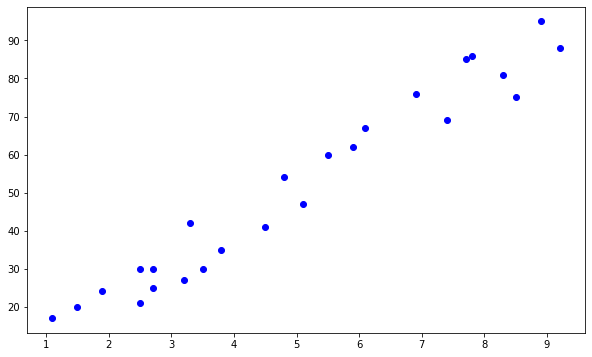

In [14]:
# Visualize the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')

In [15]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the Linear Regression Model and Perform Hypothesis Testing

In [16]:
# Add a constant term to the feature matrix
X_train_sm = sm.add_constant(X_train)

# Create and train the linear regression model using statsmodels
model = sm.OLS(y_train, X_train_sm).fit()

In [17]:
# hypothesis testing and a summary of model statistics
model_summary = model.summary()
print(model_summary)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     335.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           4.34e-13
Time:                        15:58:56   Log-Likelihood:                -62.864
No. Observations:                  20   AIC:                             129.7
Df Residuals:                      18   BIC:                             131.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8269      2.935      0.963      0.3

# Make Predictions

In [18]:
# Add a constant term (intercept) to the test feature matrix
X_test_sm = sm.add_constant(X_test)

# Use the trained model to make predictions
y_pred = model.predict(X_test_sm)


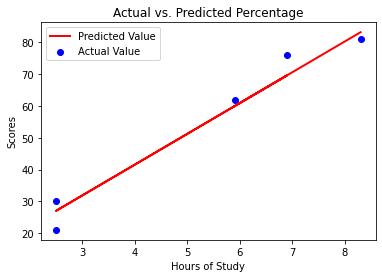

In [19]:
# Visualize the actual vs. predicted values
plt.scatter(X_test, y_test,label='Actual Value', color='blue')
plt.plot(X_test, y_pred,label='Predicted Value' ,color='red', linewidth=2)
plt.xlabel('Hours of Study')
plt.ylabel('Scores')
plt.title('Actual vs. Predicted Percentage')
plt.legend()
plt.show()

# Evaluate the Model 

In [20]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 3.9207511902099226
Mean Squared Error: 18.943211722315247
Root Mean Squared Error: 4.352380006653285


# Visualize the Results 

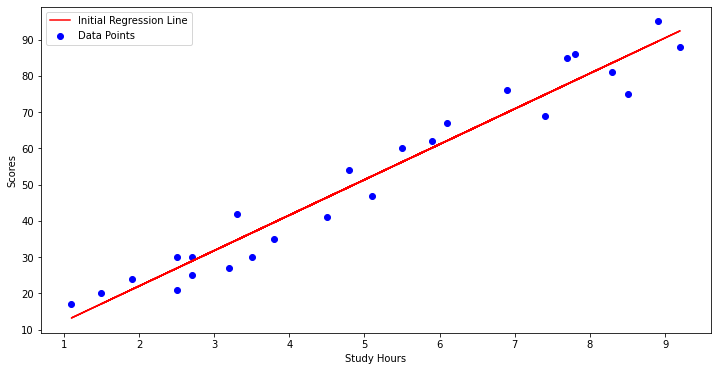

In [21]:
# Create a Linear Regression model
model = LinearRegression()
model.fit(X, y)


# Visualize the data regression line
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Initial Regression Line')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()


# Predict the Score for a New Data Point

Predict the score for a student who studies for 9.25 hours a day

In [22]:
hours = 9.25
predicted_score = model.predict([[hours]])
print(f'Predicted Score if a student studies for {hours} hrs/day: {predicted_score[0]}')

Predicted Score if a student studies for 9.25 hrs/day: 92.9098547701573


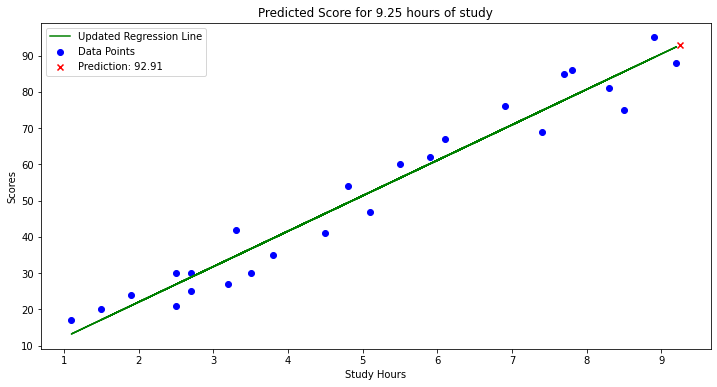

Predicted Score for 9.25 hours of study: 92.91


In [24]:
# Visualize the above predict score 
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='green', label='Updated Regression Line')
plt.scatter([hours], predicted_score, color='red', marker='x', label=f'Prediction: {predicted_score[0]:.2f}')
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.title('Predicted Score for 9.25 hours of study')
plt.legend()
plt.show()

# Display the prediction
print(f'Predicted Score for {hours} hours of study: {predicted_score[0]:.2f}')


Thank you